In [1]:
import numpy as np
import api.lib.autograd as ag

from api.lib import loss, activation
from api.lib.data import initializers
from api.lib.optimizers import GradientDescent

# XOR problem
The XOR problem is a classic problem in neural networks researches. The problem is this:
given the two inputs (data can only be '0' or '1'), we need to predict the value of XOR function.

Here are all the possible inputs and outputs:

 x | y | out
--- |---| ---
 0 | 0 | 0
 0 | 1 | 1
 1 | 0 | 1
 1 | 1 | 0


In [4]:
X = ag.Placeholder('x')
y = ag.Placeholder('y')

session = ag.Session()
factv = activation.Sigmoid(session=session)
floss = loss.MSE(session)

# Create a hidden layer with 3 nodes
W_hidden = initializers.random_uniform(2, 2)
b_hidden = initializers.random_uniform(1, 2)
p_hidden = factv(X @ W_hidden + b_hidden)

# Create the output layer
W_output = initializers.random_uniform(2, 1)
b_output = initializers.random_uniform(1, 1)
p_output = factv(p_hidden @ W_output + b_output)

# Calculate mse loss
J = floss(p_output, y)

trainable = [W_hidden, b_hidden, W_output, b_output]
optimizer = GradientDescent(lr=0.1, trainable_variables=trainable)

x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

err_history = []
epoch = 5000
samples = len(x_train)

for step in range(epoch+1):
    err = 0

    for j in range(samples):
        feed_dict = {
            'x': x_train[j],
            'y': y_train[j]
        }
        err += session.run(J, feed_dict)
        optimizer.minimize(J)

    err_history.append(err / samples)
    if step % 10 == 0:
        print("Step:", step, " Loss:", err / samples)

Step: 0  Loss: 0.3782375055263039
Step: 10  Loss: 0.3118054254854621
Step: 20  Loss: 0.26874001145773757
Step: 30  Loss: 0.2583044942538666
Step: 40  Loss: 0.25670670043886407
Step: 50  Loss: 0.2564867832178416
Step: 60  Loss: 0.25645202872844497
Step: 70  Loss: 0.2564390367032165
Step: 80  Loss: 0.2564276948598831
Step: 90  Loss: 0.25641625110883887
Step: 100  Loss: 0.2564048527150168
Step: 110  Loss: 0.25639366004405434
Step: 120  Loss: 0.2563827406784367
Step: 130  Loss: 0.25637211403906435
Step: 140  Loss: 0.2563617799225313
Step: 150  Loss: 0.25635173083990237
Step: 160  Loss: 0.25634195685787375
Step: 170  Loss: 0.2563324474298847
Step: 180  Loss: 0.25632319207126025
Step: 190  Loss: 0.25631418059763245
Step: 200  Loss: 0.25630540319977313
Step: 210  Loss: 0.2562968504577716
Step: 220  Loss: 0.25628851333322905
Step: 230  Loss: 0.25628038315395546
Step: 240  Loss: 0.2562724515965704
Step: 250  Loss: 0.2562647106689864
Step: 260  Loss: 0.2562571526934787
Step: 270  Loss: 0.2562497

In [5]:
for i in range(samples):
    output = session.run(p_output, {'x': x_train[i]})
    print(f"{x_train[i][0]}: {output[0]}")

[0 0]: [0.07660171]
[0 1]: [0.92903406]
[1 0]: [0.92888911]
[1 1]: [0.07611333]


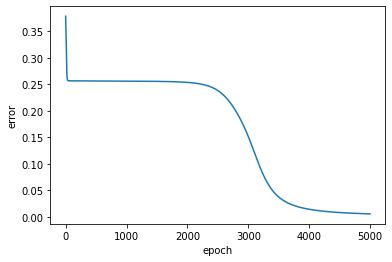

In [6]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, epoch+1), err_history)
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()